# 한국디지털미디어고등학교 소양인증제도 분석

- 2424 박정한
- 2021년 1학기 빅데이터 분석 프로젝트 보고서

## 1. 가설 설정

1.	문과보다 이과 학생의 평균 점수가 더 높을 것이다.
2.	이과보다 문과 학생의 최저 점수가 더 높을 것이다.
3.	웹프로그래밍과 학생보다 해킹방어과 학생의 평균 점수가 더 높을 것이다.
4.	1학기보다 2학기의 평균 획득 점수가 더 많을 것이다.
5.	대회점수가 상위 30%인 학생은 하위 30%인 학생보다 자격증 점수가 낮을 것이다.

## 2. 데이터 출처
한국디지털미디어고등학교 학생종합정보시스템의 IT소양종합인증제 서비스에서 보여지는 테이블 데이터를 추출하였다.
많은 데이터가 균일하게 있는 18기 입학생 (19년 1학년, 20년 2학년) 데이터를 사용하였다. 
- 2020년 2학기: https://student.dimigo.hs.kr/total-achieve/ajax-get-rank-list?year=2020&term=2
- 2020년 1학기: https://student.dimigo.hs.kr/total-achieve/ajax-get-rank-list?year=2020&term=1
- 2019년 2학기: https://student.dimigo.hs.kr/total-achieve/ajax-get-rank-list?year=2019&term=2
- 2019년 1학기: https://student.dimigo.hs.kr/total-achieve/ajax-get-rank-list?year=2019&term=1


## 3. 데이터 로드하기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
raw2019_1 = pd.read_json("./2019-1.json")
raw2019_2 = pd.read_json("./2019-2.json")
raw2020_1 = pd.read_json("./2020-1.json")
raw2020_2 = pd.read_json("./2020-2.json")
raw2019_1.shape, raw2019_2.shape, raw2020_1.shape, raw2020_2.shape

((193, 13), (195, 13), (405, 13), (399, 13))

In [3]:
raw2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                405 non-null    int64  
 1   grade               405 non-null    int64  
 2   class               405 non-null    int64  
 3   number              405 non-null    int64  
 4   name                405 non-null    object 
 5   subject_score       405 non-null    float64
 6   license_score       405 non-null    int64  
 7   contest_score       405 non-null    int64  
 8   total_score         405 non-null    float64
 9   displacement        405 non-null    object 
 10  achieve_level       405 non-null    int64  
 11  user_id             405 non-null    int64  
 12  achieve_level_text  405 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 41.3+ KB


### 3.1. 데이터 가공하기
- 학년, 이름, 등락, 번호, 인증 레벨 정보는 필요하지 않기에 열을 삭제하였다.
- 순위 정보는 일부 잘못된 정보가 있어 삭제하고 가장 최근 데이터를 기반으로 새로 생성했다.
- 각 데이터가 5개의 파일로 나누어져있어서, 하나의 데이터프레임으로 합치는 작업을 수행하였다.

In [4]:
raw2019_1.index = raw2019_1.user_id
raw2019_1.drop("user_id", axis=1, inplace=True)

raw2019_2.index = raw2019_2.user_id
raw2019_2.drop("user_id", axis=1, inplace=True)

raw2020_1.index = raw2020_1.user_id
raw2020_1.drop("user_id", axis=1, inplace=True)

raw2020_2.index = raw2020_2.user_id
raw2020_2.drop("user_id", axis=1, inplace=True)

In [5]:
score_columns = ["subject_score", "license_score", "contest_score","total_score"]

score2019_1 = raw2019_1[score_columns]
score2019_1.columns = map(lambda n: n+'_19_1', score2019_1.columns)

score2019_2 = raw2019_2[score_columns]
score2019_2.columns = map(lambda n: n+'_19_2', score2019_2.columns)

score2020_1 = raw2020_1[score_columns]
score2020_1.columns = map(lambda n: n+'_20_1', score2020_1.columns)

score2020_2 = raw2020_2[score_columns]
score2020_2.columns = map(lambda n: n+'_20_2', score2020_2.columns)

In [6]:
table = pd.merge(
    left=raw2019_1.drop(["subject_score", "license_score", "contest_score", "total_score", "displacement", "name", "achieve_level", "achieve_level_text", "number", "rank", "grade"], axis=1),
    right=pd.concat([score2019_1, score2019_2, score2020_1, score2020_2], axis=1),
    on="user_id"
)

In [35]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2094 to 2301
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               193 non-null    int64  
 1   subject_score_19_1  193 non-null    float64
 2   license_score_19_1  193 non-null    float64
 3   contest_score_19_1  193 non-null    float64
 4   total_score_19_1    193 non-null    float64
 5   subject_score_19_2  193 non-null    float64
 6   license_score_19_2  193 non-null    float64
 7   contest_score_19_2  193 non-null    float64
 8   total_score_19_2    193 non-null    float64
 9   subject_score_20_1  193 non-null    float64
 10  license_score_20_1  193 non-null    float64
 11  contest_score_20_1  193 non-null    float64
 12  total_score_20_1    193 non-null    float64
 13  subject_score_20_2  190 non-null    float64
 14  license_score_20_2  190 non-null    float64
 15  contest_score_20_2  190 non-null    float64
 16  tota

In [8]:
table['rank'] = table['total_score_20_1'].rank(ascending=False).astype(int)

In [9]:
table.sort_values(by='rank')

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
user_id,,,,,,,,,,,,,,,,,,
2180,4,96.54,0.0,100.0,196.54,96.82,90.0,136.0,322.82,97.32,90.0,127.0,314.32,96.60,104.0,145.0,345.60,1
2121,4,93.00,0.0,109.0,202.00,93.50,90.0,109.0,292.50,92.64,90.0,109.0,291.64,89.54,90.0,109.0,288.54,2
2176,4,91.40,0.0,0.0,91.40,94.65,70.0,50.0,214.65,94.27,100.0,50.0,244.27,88.58,100.0,50.0,238.58,3
2231,4,95.04,0.0,0.0,95.04,94.57,0.0,50.0,144.57,97.76,90.0,50.0,237.76,95.00,90.0,80.0,265.00,4
2094,4,98.58,0.0,109.0,207.58,98.77,0.0,109.0,207.77,98.60,0.0,136.0,234.60,98.64,0.0,136.0,234.64,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,5,67.60,0.0,0.0,67.60,80.55,0.0,0.0,80.55,73.49,0.0,0.0,73.49,72.36,0.0,0.0,72.36,189
2320,1,69.12,0.0,0.0,69.12,70.30,0.0,0.0,70.30,70.64,0.0,0.0,70.64,66.36,0.0,0.0,66.36,190
2316,5,60.88,0.0,0.0,60.88,78.04,0.0,0.0,78.04,69.87,0.0,0.0,69.87,67.29,0.0,0.0,67.29,191


## 4. 데이터 살펴보기

In [10]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2094 to 2301
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               193 non-null    int64  
 1   subject_score_19_1  193 non-null    float64
 2   license_score_19_1  193 non-null    float64
 3   contest_score_19_1  193 non-null    float64
 4   total_score_19_1    193 non-null    float64
 5   subject_score_19_2  193 non-null    float64
 6   license_score_19_2  193 non-null    float64
 7   contest_score_19_2  193 non-null    float64
 8   total_score_19_2    193 non-null    float64
 9   subject_score_20_1  193 non-null    float64
 10  license_score_20_1  193 non-null    float64
 11  contest_score_20_1  193 non-null    float64
 12  total_score_20_1    193 non-null    float64
 13  subject_score_20_2  190 non-null    float64
 14  license_score_20_2  190 non-null    float64
 15  contest_score_20_2  190 non-null    float64
 16  tota

In [11]:
table.describe()

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,190.000000,190.000000,190.000000,190.000000,193.000000
mean,3.626943,91.468756,0.155440,2.373057,93.997254,92.391658,2.072539,7.139896,101.604093,91.218601,5.025907,9.652850,105.897358,89.256053,14.021053,14.336842,117.613947,96.974093
std,1.681920,7.141933,2.159447,15.082264,17.331392,5.676232,11.763951,23.520517,31.815081,6.809612,17.944485,26.739264,38.554815,8.515804,27.818755,32.670590,55.639844,55.867630
min,1.000000,58.360000,0.000000,0.000000,58.360000,69.230000,0.000000,0.000000,69.230000,55.970000,0.000000,0.000000,55.970000,51.600000,0.000000,0.000000,51.600000,1.000000
25%,2.000000,88.780000,0.000000,0.000000,88.780000,90.220000,0.000000,0.000000,90.370000,88.870000,0.000000,0.000000,90.190000,86.415000,0.000000,0.000000,86.552500,49.000000
50%,4.000000,92.800000,0.000000,0.000000,92.960000,94.010000,0.000000,0.000000,94.340000,92.970000,0.000000,0.000000,94.250000,91.630000,0.000000,0.000000,93.710000,97.000000
75%,5.000000,96.120000,0.000000,0.000000,96.600000,96.400000,0.000000,0.000000,97.390000,95.660000,0.000000,0.000000,97.840000,95.752500,7.500000,0.000000,128.927500,145.000000
max,6.000000,100.000000,30.000000,109.000000,207.580000,99.600000,90.000000,136.000000,322.820000,99.200000,100.000000,136.000000,314.320000,99.120000,104.000000,157.000000,345.600000,193.000000


In [12]:
table.head()

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
user_id,,,,,,,,,,,,,,,,,,
2094,4,98.58,0.0,109.0,207.58,98.77,0.0,109.0,207.77,98.60,0.0,136.0,234.60,98.64,0.0,136.0,234.64,5
2121,4,93.00,0.0,109.0,202.00,93.50,90.0,109.0,292.50,92.64,90.0,109.0,291.64,89.54,90.0,109.0,288.54,2
2180,4,96.54,0.0,100.0,196.54,96.82,90.0,136.0,322.82,97.32,90.0,127.0,314.32,96.60,104.0,145.0,345.60,1
2244,2,92.48,0.0,100.0,192.48,94.73,0.0,100.0,194.73,96.42,0.0,100.0,196.42,96.69,30.0,112.0,238.69,10
2207,6,96.00,30.0,0.0,126.00,96.60,30.0,0.0,126.60,96.32,30.0,0.0,126.32,96.42,90.0,0.0,186.42,31


In [13]:
table.isnull() == True

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
user_id,,,,,,,,,,,,,,,,,,
2094,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2180,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 5. 탐색적 데이터 분석

### 5.1. 문과보다 이과 학생의 평균 총합 점수가 높을것이다

In [14]:
mun = table[table['class'] <= 2]
lee = table[table['class'] > 2]
len(table), len(lee), len(mun) 

(193, 135, 58)

In [15]:
lee.head()

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
user_id,,,,,,,,,,,,,,,,,,
2094,4,98.58,0.0,109.0,207.58,98.77,0.0,109.0,207.77,98.60,0.0,136.0,234.60,98.64,0.0,136.0,234.64,5
2121,4,93.00,0.0,109.0,202.00,93.50,90.0,109.0,292.50,92.64,90.0,109.0,291.64,89.54,90.0,109.0,288.54,2
2180,4,96.54,0.0,100.0,196.54,96.82,90.0,136.0,322.82,97.32,90.0,127.0,314.32,96.60,104.0,145.0,345.60,1
2207,6,96.00,30.0,0.0,126.00,96.60,30.0,0.0,126.60,96.32,30.0,0.0,126.32,96.42,90.0,0.0,186.42,31
2108,5,98.00,0.0,10.0,108.00,98.07,0.0,109.0,207.07,98.70,0.0,121.0,219.70,98.72,100.0,136.0,334.72,6


In [16]:
mun.head()

,class,subject_score_19_1,license_score_19_1,contest_score_19_1,total_score_19_1,subject_score_19_2,license_score_19_2,contest_score_19_2,total_score_19_2,subject_score_20_1,license_score_20_1,contest_score_20_1,total_score_20_1,subject_score_20_2,license_score_20_2,contest_score_20_2,total_score_20_2,rank
user_id,,,,,,,,,,,,,,,,,,
2244,2,92.48,0.0,100.0,192.48,94.73,0.0,100.0,194.73,96.42,0.0,100.0,196.42,96.69,30.0,112.0,238.69,10
2145,2,90.60,0.0,30.0,120.60,90.64,0.0,0.0,90.64,92.08,0.0,103.0,195.08,88.98,40.0,109.0,237.98,11
2214,2,98.48,0.0,0.0,98.48,96.40,0.0,0.0,96.40,93.80,60.0,0.0,153.80,94.13,60.0,0.0,154.13,17
2178,1,97.48,0.0,0.0,97.48,94.78,0.0,0.0,94.78,97.26,0.0,0.0,97.26,97.46,0.0,0.0,97.46,54
2198,2,97.00,0.0,0.0,97.00,98.50,0.0,0.0,98.50,95.60,0.0,0.0,95.60,94.63,0.0,0.0,94.63,75


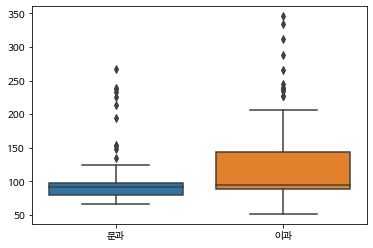

In [17]:
# 전반적인 추이를 살펴보기 위해 Boxplot을 그려보았다.
# 본 그래프를 통해 2번 가설인 "이과보다 문과 학생의 최저 점수가 더 높을 것이다."의 참 여부도 확인할 수 있다.
sns.boxplot(
    data=[mun.total_score_20_2, lee.total_score_20_2],
)
plt.xticks([0, 1], ['문과', '이과'])
plt.show()

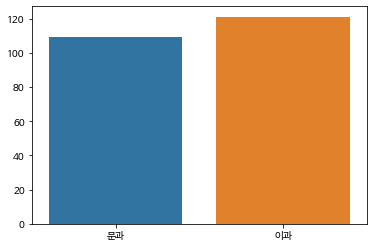

In [18]:
# 평균값의 직관적인 비교를 위해 Barplot을 그려보았다.
sns.barplot(
    x=["문과", "이과"],
    y=[mun.total_score_20_2.mean(), lee.total_score_20_2.mean()]
)
plt.show()

**결론: 문과보다 이과 학생의 평균 총합 점수가 높다.**

### 5.2. 이과보다 문과 학생의 최저 점수가 더 높을 것이다.

In [19]:
munTotalMin = mun.total_score_20_2.min()
leeTotalMin = lee.total_score_20_2.min()

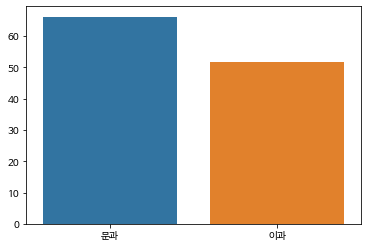

In [20]:
sns.barplot(
    x=["문과", "이과"],
    y=[munTotalMin, leeTotalMin]
)
plt.show()

결론: **이과보다 문과 학생의 최저 점수가 높다**

### 5.3. 웹프로그래밍과 학생보다 해킹방어과 학생의 평균 점수가 더 높을 것이다.

In [21]:
wp = table[(table['class'] >= 3) & (table['class'] <= 4)]
hd= table[(table['class'] >= 5) & (table['class'] <= 6)]
len(wp), len(hd)

(66, 69)

In [22]:
wpTotalMean = wp.total_score_20_2.mean()
hdTotalMean = hd.total_score_20_2.mean()

wpTotalMean, hdTotalMean
# 해킹방어과 학생보다 웹프로그래밍과 학생의 평균 점수가 높음을 알 수 있다.

(134.60560606060608, 108.04865671641791)

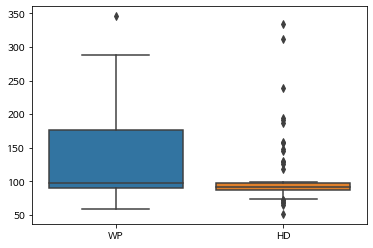

In [23]:
# 전반적인 추이를 살펴보기 위해 Boxplot을 그려보았다

sns.boxplot(
    data=[
        wp.total_score_20_2,
        hd.total_score_20_2
    ]
)
plt.xticks([0, 1], ['WP', 'HD'])
plt.show()

결론: **웹프로그래밍과 학생의 평균 총합 점수는 해킹방어과 학생의 평균 종합 점수보다 낮다**

### 5.4. 1학기보다 2학기의 평균 획득 점수가 더 많을 것이다.

In [24]:
# 각 학기의 총점에서 이전학기의 총점을 빼서 획득 점수를 구한다.
# 데이터가 19년 1학기부터 시작하기 때문에 19년 1학기 총점은 그대로 사용하였다.
delta19_1 = table['total_score_19_1']
delta19_2 = table['total_score_19_2'] - table['total_score_19_1']
delta20_1 = table['total_score_20_1'] - table['total_score_19_2']
delta20_2 = table['total_score_20_2'] - table['total_score_20_1']

In [25]:
firstSession = (delta19_1 + delta20_1) / 2
secondSession = (delta19_2 + delta20_2) / 2
firstSession.mean(), secondSession.mean()

(49.145259067357514, 9.56563157894737)

결론: **전반적으로 2학기보다는 1학기에 훨씬 많은 점수를 얻는다.**

### 5.5. 대회점수가 상위 30%인 학생은 하위 30%인 학생보다 자격증 점수가 낮을 것이다.

In [26]:
contestScoreSortedTable = table.sort_values(by="contest_score_20_2", ascending=False)
top30p = contestScoreSortedTable.iloc[:int(len(contestScoreSortedTable) * 0.3)]
under30p = contestScoreSortedTable.iloc[int(len(contestScoreSortedTable) * 0.7):]

In [27]:
top30p.license_score_20_2.mean(), under30p.license_score_20_2.mean()

(32.70175438596491, 6.181818181818182)

결론: **대회 점수가 상위 30%인 학생은 하위 30%인 학생보다 평균 자격증 점수가 5배가량 높았다**